<a href="https://colab.research.google.com/github/gmehra123/data_science_projs/blob/main/Hypothesis_testing_article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hypothesis Testing Using Python

**What is a hypothesis test?**
> A hypothesis test is used to test whether the data fit a particular hypothesis. We generally infer some metric (parameter) of the population from a sample (statistic). We formulate 2 hypothesis, the null hypothesis and the alternate hypothesis and a test statistic. We check to see the probability of getting the test stastic under the null hypothesis. This represents the chance of seeing a value as extreme as the test statistic under the condition that the null hypothesis is true. If this probability is very low then we know that what you are observing is an actual effect not due to sampling variability

* Test of 1 proportion
* Test of 2 samples
* ANOVA test for statistical significance (Multiple Categories/samples)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Test of hypothesized value and inferring from a sample

In [2]:
late=pd.read_feather('https://assets.datacamp.com/production/repositories/5982/datasets/887ec4bc2bcfd4195e7d3ad113168555f36d3afa/late_shipments.feather')

In [3]:
stack=pd.read_feather('https://assets.datacamp.com/production/repositories/5982/datasets/c59033b93930652f402e30db77c3b8ef713dd701/stack_overflow.feather')

In [4]:
stack.shape[0]

2261

In [5]:
stack['converted_comp'].mean()

119574.71738168952

1. **H0**: $U_{late}$-$U_{not-late}$ = 0
2. **H1**: $U_{late}$-$U_{not-late}$>0

In [ ]:
# Test statistic
sample_mean=stack['converted_comp'].mean()

In [ ]:
# Determining the sample variability and std error using bootstrapping
rep=np.empty(1000)
for i in range(1000):
  # Pulling a sample with replacement from the 
  sample=stack.sample(frac=1,replace=True)
  mean=sample['converted_comp'].mean()
  rep[i]=mean

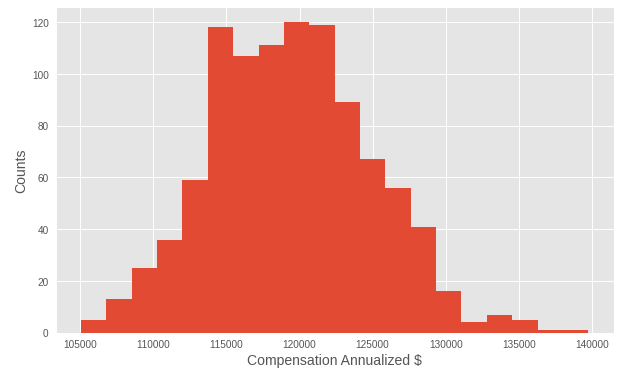

In [ ]:
# Visually plotting the bootstrap distribution of average salary
fig,ax=plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(10)
ax.hist(rep,bins=20)
ax.set_xlabel('Compensation Annualized $',fontsize=14)
ax.set_ylabel('Counts',fontsize=14)
plt.style.use('ggplot')
plt.show()

In [ ]:
#Find the std error from the bootstrap distribution
std_error=np.std(rep)
print(std_error)

5500.247908891154


In [ ]:
# Estimating standard error from sample
estimated=np.std(stack['converted_comp'])/np.sqrt(2261)
print(estimated)

5583.543382522849


In [ ]:
# Calculate z score
z_score=(sample_mean-100000)/std_error
print(z_score)

3.5588791098028474


In [ ]:
from scipy.stats import norm
p_val=2*(1-norm.cdf(z_score,loc=0,scale=1))

In [ ]:
print('p value is ',p_val,'less than 0.05 and thus we reject the null hypothesis')

p value is  0.00037244090113142114 less than 0.05 and thus we reject the null hypothesis


### Test of difference of means

In [ ]:
# Calculating the weights by late Yes and No
means=late.groupby('late')['weight_kilograms'].mean()
print(means)

late
No     1897.791267
Yes    2715.672131
Name: weight_kilograms, dtype: float64


In [ ]:
# Calculate the difference in means
diff_means=means[1]-means[0]
print(diff_means)

817.8808638418964


std_error=$\sqrt{\frac{Syes^2}{nyes}+\frac{Sno^2}{nno}}$

In [72]:
# Getting the counts of the packages that were late
counts=late['late'].value_counts()
nno=counts[0]
nyes=counts[1]

# Calculating standard deviations for the late and not late packages
std=late.groupby('late')['weight_kilograms'].std()
syes=std[0]
sno=std[1]

# Now we can calculate the std error
std_error=np.sqrt(sno**2/nno+syes**2/nyes)
std_error

412.2832729146232

In [71]:
# Confirm with boot strap
for i in range(1000):
  sample=late.sample(frac=1,replace=True)
  means=sample.groupby('late')['weight_kilograms'].mean()
  diff_means=means[1]-means[0]
  rep[i]=diff_means

np.std(rep)

344.1733029853536

In [69]:
# calculate t stat
t_score=(diff_means-0)/std_error
t_score

2.8740971112937093

In [70]:
# Calculate the p_val
from scipy.stats import t
1-t.cdf(t_score,df=n_yes+n_no-2)

0.002068915254885395

### Test across multiple categories (ANOVA)

In [7]:
# looking at the data to see any differences
stack.groupby('job_sat')['converted_comp'].mean()

job_sat
Very dissatisfied        127539.679245
Slightly dissatisfied     96643.324561
Neither                  110593.980100
Slightly satisfied        96084.992647
Very satisfied           147281.484642
Name: converted_comp, dtype: float64

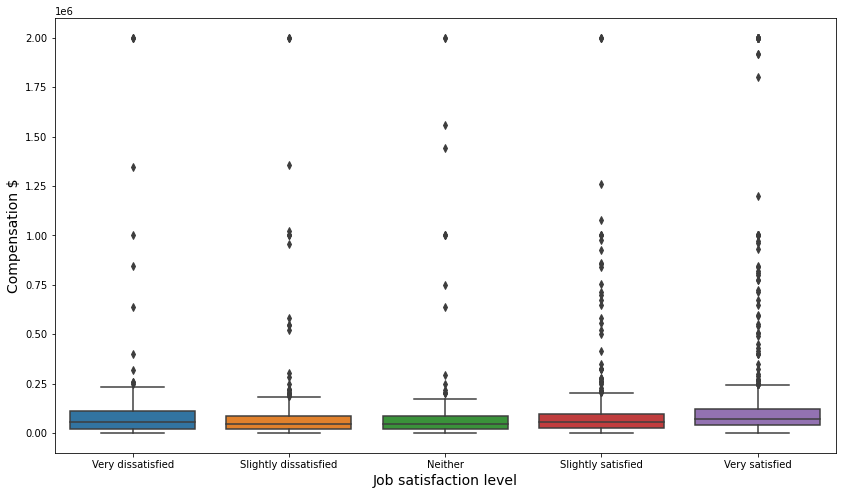

In [8]:
# Visualizing the difference in compensation across job satisfaction categories
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(14)
sns.boxplot(x='job_sat',y='converted_comp',data=stack)
ax.set_xlabel('Job satisfaction level',fontsize=14)
ax.set_ylabel('Compensation $',fontsize=14)
plt.show()

In [82]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 8.7 MB/s 
     |████████████████████████████████| 9.9 MB 50.0 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196208 sha256=66ecd195c0962147ad52b7fd7b5f6076175b4a0ab0912d69e898b9c4a9610493
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=8a96f6f0f61cb72c39bba4492191c0b313c8691ef5c5478cf71bb7dae2b612e4
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [6]:
import pingouin

In [10]:
pingouin.anova(dv='converted_comp',between='job_sat',data=stack)

,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.480485,0.001315,0.007882


In [11]:
pingouin.pairwise_tests(data=stack,dv='converted_comp',between='job_sat',padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931
1,job_sat,Slightly satisfied,Neither,False,True,-0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,-0.068513
2,job_sat,Slightly satisfied,Very dissatisfied,False,True,-1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,-0.145624
3,job_sat,Slightly satisfied,Slightly dissatisfied,False,True,-0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,-0.002719
4,job_sat,Very satisfied,Neither,False,True,1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,0.120115
5,job_sat,Very satisfied,Very dissatisfied,False,True,0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,0.063479
6,job_sat,Very satisfied,Slightly dissatisfied,False,True,3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,0.173247
7,job_sat,Neither,Very dissatisfied,False,True,-0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,-0.058537
8,job_sat,Neither,Slightly dissatisfied,False,True,0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,0.055707
9,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131
